Практическая работа №7

Задание:
Провести морфологический анализ текстов

Решение:

1. Взять 2 текста разных стилей (например, научную статью и
художественный рассказ) на русском языке.

In [1]:
# Read ./text_1.txt and ./text_2.txt

def read_file(file_name,encoding="utf-8"):
    with open(file_name, 'r', encoding=encoding) as f:
        text = f.read()
    return text

In [2]:
text_1 = read_file('./text_1.txt',encoding="CP1251")
# Remove first 3 lines and remove all empty lines
text_1 = ' '.join([line for line in text_1.split('\n')[7:] if len(line) > 1])
print(text_1[:50])

Я слышал эти рассказы под Аккерманом, в Бессарабии


In [3]:
text_2 = read_file('./text_2.txt')
# Remove all empty lines
text_2 = ' '.join([line for line in text_2.split('\n') if len(line) > 1])
print(text_2[:30])

Как вырастить солёную пирамидк


2. Выполнить предобработку текстов (очистка, токенизация, лемматизацию не делать!).

In [4]:
import nltk
nltk.download('punkt')
# download stopwords ru
nltk.download('stopwords')
from nltk.corpus import stopwords 
from nltk.tokenize import sent_tokenize, word_tokenize

from string import punctuation

def preprocess(text):
    sentences = sent_tokenize(text)
    # Lower case
    sentences = [sentence.lower() for sentence in sentences]
    # Remove punctuation
    sentences = [''.join(c for c in sentence if c not in punctuation) for sentence in sentences]
    # Tokenize words
    sentences = [word_tokenize(sentence) for sentence in sentences]
    # Remove stopwords
    stop_words = stopwords.words('russian')
    sentences = [[word for word in sentence if word not in stop_words] for sentence in sentences]
    return sentences

[nltk_data] Downloading package punkt to /home/codespace/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
prep_text_1 = preprocess(text_1)

print(prep_text_1[:2])

prep_text_2 = preprocess(text_2)

print(prep_text_2[:2])

[['слышал', 'рассказы', 'аккерманом', 'бессарабии', 'морском', 'берегу'], ['однажды', 'вечером', 'кончив', 'дневной', 'сбор', 'винограда', 'партия', 'молдаван', 'которой', 'работал', 'ушла', 'берег', 'моря', 'старуха', 'изергиль', 'остались', 'густой', 'тенью', 'виноградных', 'лоз', 'лежа', 'земле', 'молчали', 'глядя', 'тают', 'голубой', 'мгле', 'ночи', 'силуэты', 'тех', 'людей', 'пошли', 'морю']]
[['вырастить', 'солёную', 'пирамидку', 'кому', 'нужна', 'эта', 'обычная', 'скучная', 'соль'], ['давайте', 'превратим', 'мелкие', 'белые', 'крупинки', 'потрясающие', 'пирамидальные', 'кристаллы', 'домашних', 'условиях']]


3. Используя библиотеку PyMorphy2 провести морфологический анализ:
    1) Подсчитать количество слов каждой части речи и представить результаты в виде диаграмм.

In [6]:
import pymorphy2

morph = pymorphy2.MorphAnalyzer()

def morph_Word(word):
    """Возвращает часть речи слова"""
    return morph.parse(word)[0].tag.POS

def get_Pos(sentences):
    """Возвращает список частей речи для каждого слова в предложении"""
    return [[(word, morph_Word(word)) for word in sentence] for sentence in sentences]

def get_Count_Pos(morphedText):
    countPos = {}
    for sentence in morphedText:
        for word in sentence:
            if word[1] in countPos:
                countPos[word[1]] += 1
            else:
                countPos[word[1]] = 1
    return countPos

In [7]:
sentence = prep_text_1[0]
print(sentence)

print(get_Pos([sentence]))

['слышал', 'рассказы', 'аккерманом', 'бессарабии', 'морском', 'берегу']
[[('слышал', 'VERB'), ('рассказы', 'NOUN'), ('аккерманом', 'NOUN'), ('бессарабии', 'NOUN'), ('морском', 'ADJF'), ('берегу', 'NOUN')]]


In [8]:
allTextPos_1 = get_Pos(prep_text_1)
allTextPos_2 = get_Pos(prep_text_2)

countPos_1 = get_Count_Pos(allTextPos_1)
countPos_2 = get_Count_Pos(allTextPos_2)

sortedPosCount_1 = {k: v for k, v in sorted(countPos_1.items(), key=lambda item: item[1])}
sortedPosCount_2 = {k: v for k, v in sorted(countPos_2.items(), key=lambda item: item[1])}

print(sortedPosCount_1)
print(sortedPosCount_2)

{'PRED': 6, 'INTJ': 9, 'NUMR': 19, 'PRTS': 24, 'CONJ': 25, 'COMP': 29, 'PREP': 39, 'ADJS': 45, 'NPRO': 57, 'PRTF': 59, 'PRCL': 61, 'GRND': 85, 'INFN': 119, 'ADVB': 260, None: 395, 'ADJF': 549, 'VERB': 1022, 'NOUN': 1307}
{'INTJ': 1, 'NUMR': 2, 'PRED': 3, 'GRND': 5, 'NPRO': 6, 'PRTS': 6, 'PREP': 16, 'COMP': 16, 'CONJ': 21, 'ADJS': 25, 'PRCL': 25, 'PRTF': 34, None: 62, 'INFN': 93, 'ADVB': 120, 'VERB': 255, 'ADJF': 357, 'NOUN': 801}


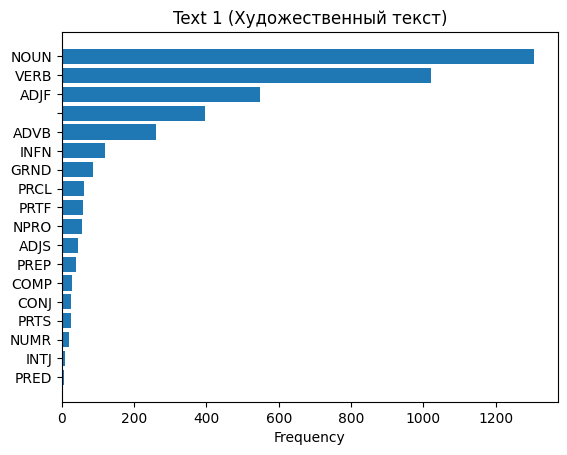

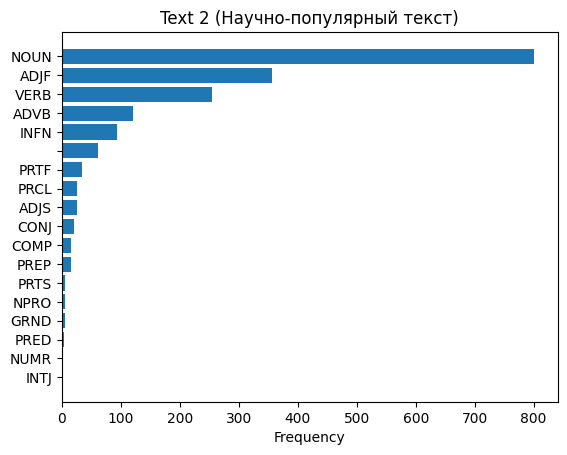

In [9]:
import matplotlib.pyplot as plt

def plot_count_pos(countPos, title):
    # use histogram to plot the frequency of each POS tag
    plt.barh(range(len(countPos)), list(countPos.values()), align='center')
    plt.yticks(range(len(countPos)), list(countPos.keys()))
    plt.xlabel('Frequency')
    plt.title(title)
    plt.show()

plot_count_pos(sortedPosCount_1, 'Text 1 (Художественный текст)')
plot_count_pos(sortedPosCount_2, 'Text 2 (Научно-популярный текст)')

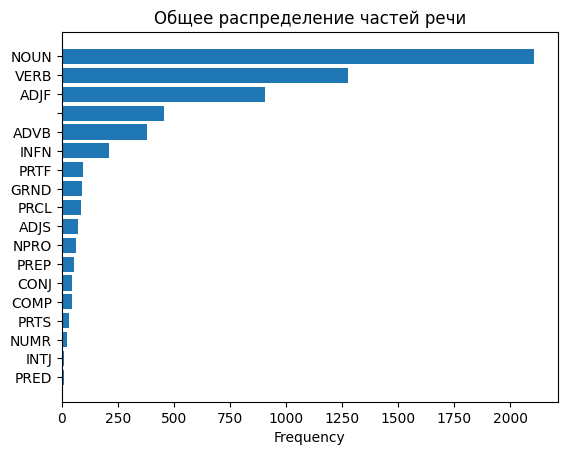

In [10]:
joinedPosCount = {}
for pos in countPos_1:
    joinedPosCount[pos] = countPos_1[pos] + countPos_2[pos]

sortedPosCount_All = {k: v for k, v in sorted(joinedPosCount.items(), key=lambda item: item[1])}

plot_count_pos(sortedPosCount_All, 'Общее распределение частей речи')

    2. Найти наиболее и наименее часто используемые части речи в тексте.

In [11]:
# Sort by value

print(f"Самый редкий тип слова в тексте 1: {list(sortedPosCount_1.keys())[0]} : {list(sortedPosCount_1.values())[0]}")
print(f"Самый редкий тип слова в тексте 2: {list(sortedPosCount_2.keys())[0]} : {list(sortedPosCount_2.values())[0]}")
print(f"Самый редкий тип слова в обоих текстах: {list(sortedPosCount_All.keys())[0]} : {list(sortedPosCount_All.values())[0]}")

print(f"Самый частый тип слова в тексте 1: {list(sortedPosCount_1.keys())[-1]} : {list(sortedPosCount_1.values())[-1]}")
print(f"Самый частый тип слова в тексте 2: {list(sortedPosCount_2.keys())[-1]} : {list(sortedPosCount_2.values())[-1]}")
print(f"Самый частый тип слова в обоих текстах: {list(sortedPosCount_All.keys())[-1]} : {list(sortedPosCount_All.values())[-1]}")

Самый редкий тип слова в тексте 1: PRED : 6
Самый редкий тип слова в тексте 2: INTJ : 1
Самый редкий тип слова в обоих текстах: PRED : 9
Самый частый тип слова в тексте 1: NOUN : 1307
Самый частый тип слова в тексте 2: NOUN : 801
Самый частый тип слова в обоих текстах: NOUN : 2108
